IEEE CIS FRAUD DETECTION KAGGLE competition
week 3

In [6]:
#Firstly, let's load our files and analyze them

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('test_identity.csv')

In [4]:
print(df1.describe())

       TransactionID          id_01          id_02         id_03  \
count   1.419070e+05  141907.000000  136976.000000  66481.000000   
mean    3.972166e+06     -11.325734  192658.729909      0.053008   
std     1.469966e+05      14.508520  182613.277215      0.684551   
min     3.663586e+06    -100.000000       2.000000    -12.000000   
25%     3.859268e+06     -12.500000   63339.500000      0.000000   
50%     4.001774e+06      -5.000000  133189.500000      0.000000   
75%     4.105284e+06      -5.000000  265717.500000      0.000000   
max     4.170239e+06       0.000000  999869.000000     11.000000   

              id_04          id_05          id_06        id_07        id_08  \
count  66481.000000  134750.000000  134750.000000  5059.000000  5059.000000   
mean      -0.087454       1.246033      -6.803829    12.493180   -36.577782   
std        0.840351       5.071394      15.921457    11.678206    25.544185   
min      -19.000000     -81.000000    -100.000000   -41.000000  -100.00

In [5]:
df1.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [7]:
df2 = pd.read_csv('test_transaction.csv')
df2.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df3 = pd.read_csv('train_identity.csv')
df4 = pd.read_csv('train_transaction.csv')

In [9]:
df3.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [10]:
train_df = pd.merge(df3, df4, on='TransactionID', how='left')

In [11]:
print(train_df.describe())

       TransactionID          id_01          id_02         id_03  \
count   1.442330e+05  144233.000000  140872.000000  66324.000000   
mean    3.236329e+06     -10.170502  174716.584708      0.060189   
std     1.788496e+05      14.347949  159651.816856      0.598231   
min     2.987004e+06    -100.000000       1.000000    -13.000000   
25%     3.077142e+06     -10.000000   67992.000000      0.000000   
50%     3.198818e+06      -5.000000  125800.500000      0.000000   
75%     3.392923e+06      -5.000000  228749.000000      0.000000   
max     3.577534e+06       0.000000  999595.000000     10.000000   

              id_04          id_05          id_06        id_07        id_08  \
count  66324.000000  136865.000000  136865.000000  5155.000000  5155.000000   
mean      -0.058938       1.615585      -6.698710    13.285354   -38.600388   
std        0.701015       5.249856      16.491104    11.384207    26.084899   
min      -28.000000     -72.000000    -100.000000   -46.000000  -100.00

In [12]:
list(train_df.columns)

['TransactionID',
 'id_01',
 'id_02',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_10',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 

In [14]:
# let's chech unique values of isFraud column

In [13]:
train_df['isFraud'].unique().tolist()

[0, 1]

In [18]:
train_df.isnull().sum()

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
                  ...  
V310                  2
V311                  2
V312                  2
V313                218
V314                218
V315                218
V316                  2
V317                  2
V318                  2
V319                  2
V320            

<BarContainer object of 434 artists>

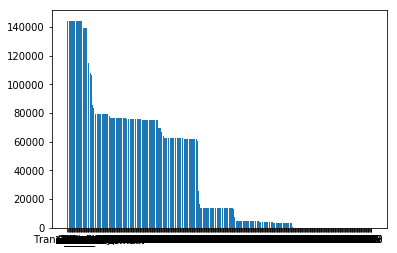

In [27]:
plt.bar(height=train_df.isnull().sum().sort_values(ascending=False),
        x=train_df.isnull().sum().index
       )

In [29]:
# as we can see from above bar plot there are quite many NA values

In [30]:
# Thus, we need to clean it

In [35]:
train_df.isnull().sum()*100/len(train_df)

TransactionID     0.000000
id_01             0.000000
id_02             2.330257
id_03            54.016071
id_04            54.016071
id_05             5.108401
id_06             5.108401
id_07            96.425922
id_08            96.425922
id_09            48.052110
id_10            48.052110
id_11             2.256765
id_12             0.000000
id_13            11.726165
id_14            44.503685
id_15             2.251912
id_16            10.325654
id_17             3.372321
id_18            68.722137
id_19             3.407681
id_20             3.447200
id_21            96.423149
id_22            96.416215
id_23            96.416215
id_24            96.708798
id_25            96.441868
id_26            96.420375
id_27            96.416215
id_28             2.256765
id_29             2.256765
                   ...    
V310              0.001387
V311              0.001387
V312              0.001387
V313              0.151144
V314              0.151144
V315              0.151144
V

In [33]:
def missing_values(df, percentage):

    columns = df.columns
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

    missing_drop = list(missing_value_df[missing_value_df.percent_missing>percentage].column_name)
    df = df.drop(missing_drop, axis=1)
    return df

In [34]:
train_df2 = missing_values(train_df, 20)

In [38]:
train_df.shape

(144233, 434)

In [39]:
train_df2.shape

(144233, 247)

In [41]:
train_df2.isnull().sum()*100/len(train_df2)

TransactionID      0.000000
id_01              0.000000
id_02              2.330257
id_05              5.108401
id_06              5.108401
id_11              2.256765
id_12              0.000000
id_13             11.726165
id_15              2.251912
id_16             10.325654
id_17              3.372321
id_19              3.407681
id_20              3.447200
id_28              2.256765
id_29              2.256765
id_31              2.739318
id_35              2.251912
id_36              2.251912
id_37              2.251912
id_38              2.251912
DeviceType         2.373243
DeviceInfo        17.726179
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
card1              0.000000
card2              0.625377
card3              0.119251
card4              0.127571
                    ...    
V292               0.001387
V293               0.001387
V294               0.001387
V295               0.001387
V296               0

In [88]:
train_df3 = train_df2

In [101]:
train_df3=train_df3._get_numeric_data()
train_df3=train_df3.dropna()

In [102]:
idx = int(len(train_df3) * 0.8)
training_set, validation_set = train_df3[:idx], train_df3[idx:]

In [103]:
y_train = training_set['isFraud']
X_train = training_set.drop('isFraud', axis=1)
y_test = validation_set['isFraud']
X_test = validation_set.drop('isFraud', axis=1)

In [104]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [105]:
logistic = linear_model.LogisticRegression(solver='lbfgs')

In [106]:
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [107]:
print('Score:', logistic.score(X_test, y_test))

Score: 0.9025020773705106
